## Is Fandango still inflating ratings?

### Background

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango https://www.fandango.com is an online movie ratings aggregator). 

His article: https://fivethirtyeight.com/features/fandango-movies-ratings

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

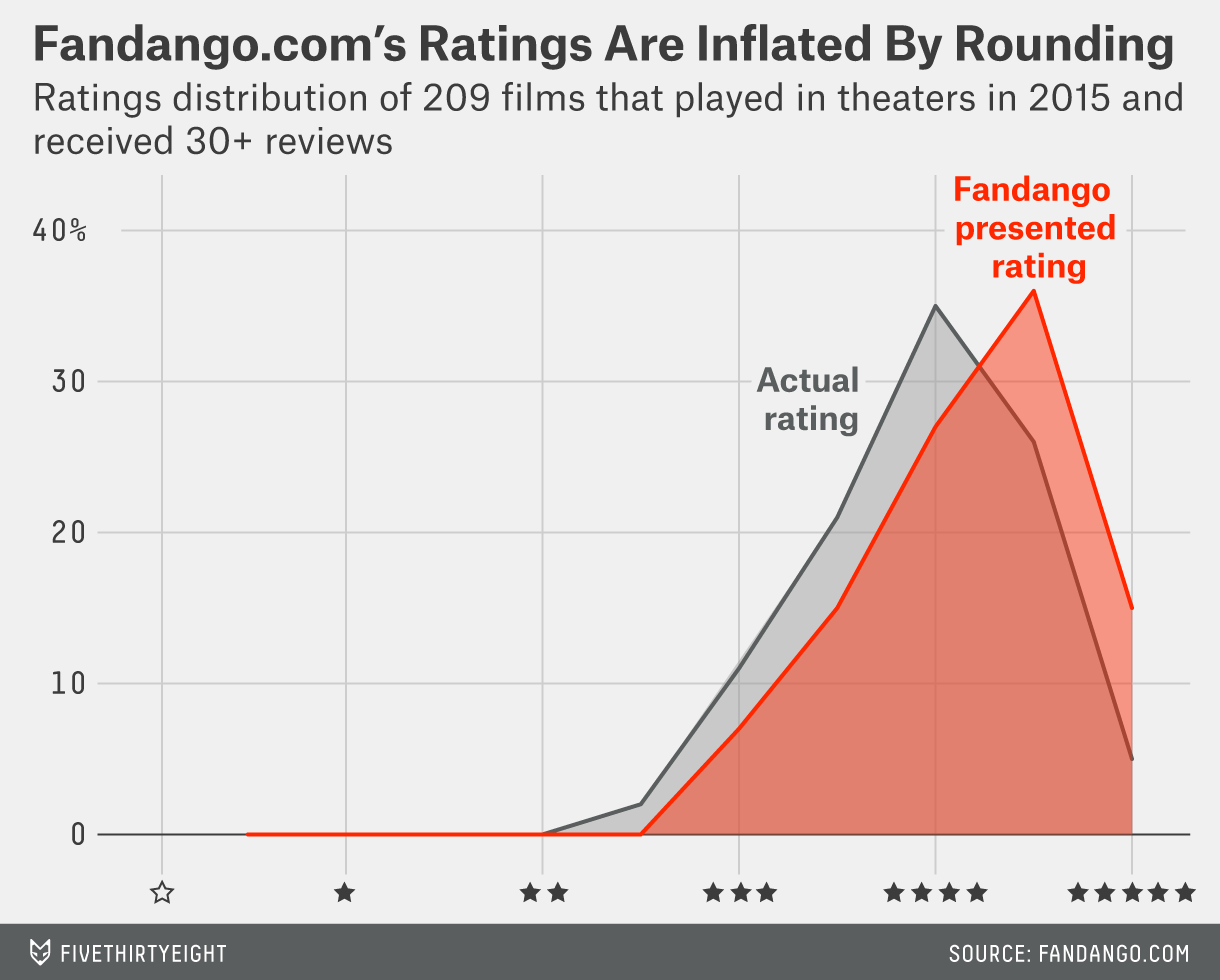

The two distributions above are displayed using a simple line plot, which is also a valid way to show the shape of a distribution. The variable being examined is movie rating, and for each unique rating we can see its relative frequency (percentage) on the y-axis of the graph. When an analysis report is intended for large audiences, relative frequencies (especially percentages) are preferred over absolute frequencies.

Both distributions above are strongly left skewed, suggesting that movie ratings on Fandango are generally high or very high. We can see there's no rating under 2 stars in the sample Hickey analyzed. The distribution of displayed ratings is clearly shifted to the right compared to the actual rating distribution, suggesting strongly that Fandango inflates the ratings under the hood.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Compare the system's characteristics previous and after Hickey's analysis

Before: https://github.com/fivethirtyeight/data/tree/master/fandango

After: https://github.com/mircealex/Movie_ratings_2016_17        

## Understanding the data

In [1]:
import pandas as pd
fandango_score_comparison = pd.read_csv('/Users/brindhamanivannan/Desktop/data-projects/datasets/fandango_score_comparison.csv')
fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
fandango_score_comparison.shape

(146, 22)

In [3]:
fandango_score_comparison.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [4]:
fandango_score_comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [5]:
before_analysis = fandango_score_comparison[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']]

In [6]:
before_analysis

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0


In [7]:
movie_ratings_16_17 = pd.read_csv('/Users/brindhamanivannan/Desktop/data-projects/datasets/movie_ratings_16_17.csv')

In [8]:
movie_ratings_16_17.shape

(214, 15)

In [9]:
movie_ratings_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [10]:
movie_ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [11]:
after_analysis = movie_ratings_16_17[['movie', 'year', 'fandango']]

In [12]:
after_analysis

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


The goal of this project is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

Determine whether the sampling is random or not — did all the movies have an equal chance to be included in the two samples?
Let us make sure that the samples are representative, otherwise we will get a large sampling error and, ultimately, wrong conclusions.

https://github.com/fivethirtyeight/data/blob/master/fandango/README.md

- fandango_score_comparison.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md

- movie_ratings_16_17.csv contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

Since, the sampling processes were not random, and the resulting samples are very unlikely to be representative of the population we're interested in describing, we will change the goal of our analysis. 

Let's come up with come up with creative workarounds that are good enough. At this point, we have at least two alternatives: either we collect new data or we change the goal of our analysis by placing some limitations on it.
Tweaking our goal seems a much faster choice. 

Change slightly the current goal of our analysis such that:

- The population of interest changes and the samples we currently work with become representative.
- The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## New goal

Finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

Define popular - Consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

## Isolating the samples we need

after_analysis dataset does not have number of fan ratings. We will have to check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [13]:
after_analysis.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


90% of the movies in our sample are popular as per the website info. This is enough and we move forward with a bit more confidence.

In [14]:
before_analysis['Fandango_votes'] < 30

0      False
1      False
2      False
3      False
4      False
       ...  
141    False
142    False
143    False
144    False
145    False
Name: Fandango_votes, Length: 146, dtype: bool

In [15]:
sum(before_analysis['Fandango_votes'] < 30)

0

The documentation also states clearly that there're only movies with at least 30 fan ratings. So we are good.

Now, we need to isolate only the movies released in 2015 and 2016.

In [16]:
before_analysis.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [17]:
before_analysis['Year'] = before_analysis['FILM'].str[-5:-1]

<ipython-input-17-16868d1b31e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_analysis['Year'] = before_analysis['FILM'].str[-5:-1]


In [18]:
before_analysis.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [19]:
before_analysis['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [20]:
before_analysis_2015 = before_analysis[before_analysis['Year'] == '2015'].copy()
before_analysis_2015

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
140,Inside Out (2015),4.5,4.5,15749,0.0,2015
141,Mr. Holmes (2015),4.0,4.0,1348,0.0,2015
142,'71 (2015),3.5,3.5,192,0.0,2015
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,2015


In [21]:
before_analysis_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [22]:
after_analysis.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [23]:
after_analysis['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [24]:
after_analysis_2016 = after_analysis[after_analysis['year'] == 2016].copy()

In [25]:
after_analysis_2016

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
...,...,...,...
207,Whiskey Tango Foxtrot,2016,3.5
208,Why Him?,2016,4.0
209,X-Men: Apocalypse,2016,4.0
212,Zoolander 2,2016,2.5


In [26]:
after_analysis_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

Now, we have the dataset before_analysis_2015 and after_analysis_2016 ready for our analysis. Recall, our goal is to find out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

## Comparing distribution shapes for 2015 and 2016

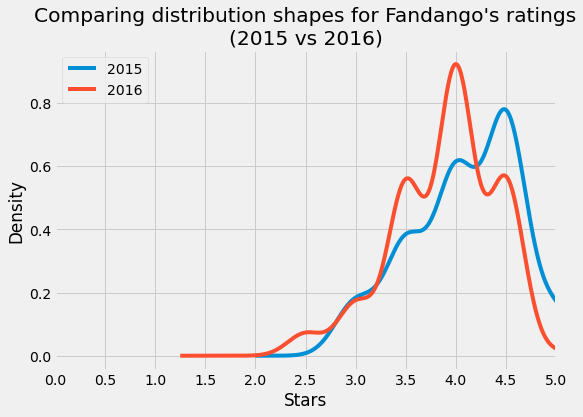

In [27]:
# Generate two kernel density plots

import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')
before_analysis_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8,5.5))
after_analysis_2016['fandango'].plot.kde(label='2016', legend=True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)")
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

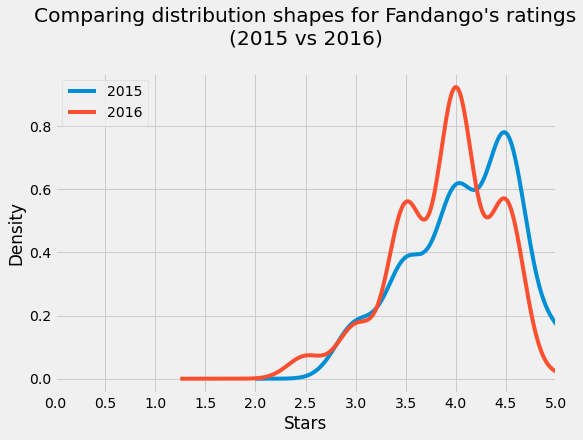

In [28]:
# Generate two kernel density plots

import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')
before_analysis_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8,5.5))
after_analysis_2016['fandango'].plot.kde(label='2016', legend=True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)", y = 1.07) 
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

## Analyze the two kernel density plots

Observations:

- Both distributions are strongly left skewed
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution which is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015.
- We do see evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016
- We can also tell about the direction of the difference, movies in 2016 were rated lower compared to 2015

## Comparing relative frequencies

We now need to analyze more granular information. Let us examine the frequency distribution tables of the two distributions.

In [29]:
before_analysis_2015['Fandango_Stars'].value_counts()

4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: Fandango_Stars, dtype: int64

In [30]:
before_analysis_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [31]:
before_analysis_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [32]:
after_analysis_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

- In 2016, 0.5% of the movies have 5 star ratings but in 2015 the 5 start rating was close to 7%
- In 2016, 4.5 stars rating and 5 star ratings are significantly lower compared to 2015
- In 2016, the minimum rating is also lower compared to 2015. 

There clearly is a difference between the two frequency distributions.

However for 3.5 and 6 stars, in 2016, the percentage has increased. the direction of the difference is not as clear as it was on the kernel density plots. Now, how do we determine the direction of the change?

## Direction of change

We'll take summary statistics to get a more precise picture about the direction of the difference.

In [33]:
# Compute the mean, median, and mode for each distribution

mean_2015 = before_analysis_2015['Fandango_Stars'].mean()
mean_2016 = after_analysis_2016['fandango'].mean()
print(mean_2015)
print(mean_2016)

4.0852713178294575
3.887434554973822


In [34]:
median_2015 = before_analysis_2015['Fandango_Stars'].median()
median_2016 = after_analysis_2016['fandango'].median()
print(median_2015)
print(median_2016)

4.0
4.0


In [35]:
mode_2015 = before_analysis_2015['Fandango_Stars'].mode()
mode_2016 = after_analysis_2016['fandango'].mode()
print(mode_2015)
print(mode_2016)

0    4.5
dtype: float64
0    4.0
dtype: float64


In [36]:
mode_2015 = before_analysis_2015['Fandango_Stars'].mode()[0]
mode_2016 = after_analysis_2016['fandango'].mode()[0]
print(mode_2015)
print(mode_2016)

4.5
4.0


In [37]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


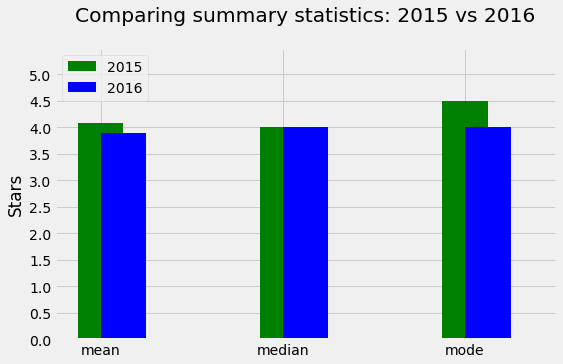

In [38]:
# Generate a grouped bar plot to show comparatively how the mean, median, and mode varied for 2015 and 2016

plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'green', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'blue', align = 'edge', label = '2016', width = .25, rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend()
plt.show()

- The mean rating was lower in 2016 with approximately 0.2
- The median is the same for both the distributions
- The mode is lower in 2016 by 0.5


## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

Looks like Fandango's officials have fixed the bug in their system, as promised.